<a href="https://colab.research.google.com/github/nidhisdata/Python-Learnings/blob/main/12_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!/bin/bash
! curl -L -o /content/archive.zip\
https://www.kaggle.com/api/v1/datasets/download/meirnizri/covid19-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4776k  100 4776k    0     0  7882k      0 --:--:-- --:--:-- --:--:-- 42.4M


In [7]:
! unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Covid Data.csv          


In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("/content/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [10]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [11]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [13]:
df['PREGNANT'].value_counts()

,count
PREGNANT,
97,523511
2,513179
1,8131
98,3754


In [14]:
mask = df['PREGNANT'] > 2
df = df[~mask]

print(df)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
3            2             1    1             1  12/06/2020       97   
5            2             1    1             2  9999-99-99        2   
6            2             1    1             1  9999-99-99       97   
7            2             1    1             1  9999-99-99       97   
...        ...           ...  ...           ...         ...      ...   
1048563      2            13    1             1  9999-99-99       97   
1048564      1            13    1             1  9999-99-99       97   
1048565      1            13    1             1  9999-99-99       97   
1048567      1            13    1             2  9999-99-99        2   
1048569      1            13    1             2  9999-99-99        2   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

In [15]:
df['CLASIFFICATION_FINAL'].value_counts()

,count
CLASIFFICATION_FINAL,
7,262954
3,176465
6,62872
5,12788
1,3982
4,1589
2,660


In [16]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 1
PATIENT_TYPE =>	 2
DATE_DIED =>	 330
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 116
PREGNANT =>	 2
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [17]:
df['DATE_DIED'] = [2 if row =='9999-99-99' else 1 for row in df['DATE_DIED']]
df['DATE_DIED'].value_counts()

,count
DATE_DIED,
2,493975
1,27335


In [18]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 1
PATIENT_TYPE =>	 2
DATE_DIED =>	 2
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 116
PREGNANT =>	 2
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


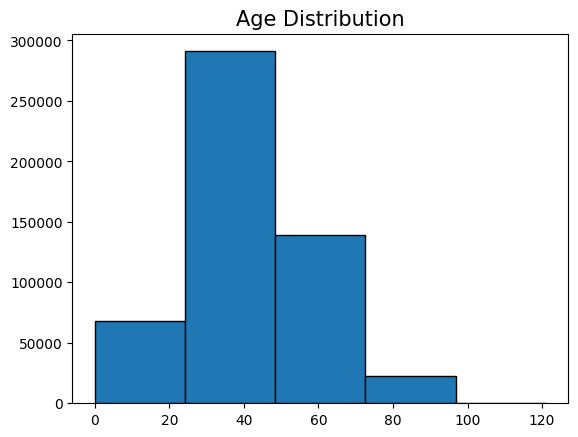

In [19]:
import matplotlib.pyplot as plt
plt.title('Age Distribution', fontsize=15)
plt.hist(x=df['AGE'], bins=5, edgecolor='black')
plt.show()


1000, 4
Total no of batch = 1000/batch_size
Dimension = 4
(Batch size, Dimension)

Classification -
in_dim = 4
out_dim = 8
input_layer = Linear(in_dim, out_dim)
output_layer = Linear(out_dim, Num_cls, activation)

Num_cls = Number of classes in the data
activation = 'Softmax' or 'Sigmoid'
	    Num_cls>2	 Num_cls=2

Regression -
in_dim = 4
out_dim = 8
input_layer = Linear(in_dim, out_dim)
output_layer = Linear(out_dim, 1, activation='Sigmoid')
activation=None

In [24]:
data = df.fillna(0)
X = df[['PREGNANT', 'DIABETES']]
y = df['DATE_DIED']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5469
           2       0.95      1.00      0.97     98793

    accuracy                           0.95    104262
   macro avg       0.47      0.50      0.49    104262
weighted avg       0.90      0.95      0.92    104262

